In [1]:
using Pkg
using QuadGK
using Polynomials
using Plots
using NoveltyColors
using DataFrames


(process:22876): GLib-GIO-WARNING **: 13:22:47.679: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22031.10071.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [2]:
function Legendre(n)
    P = []
    if n >= 0
        push!(P, Polynomial([1]))
    end
    if n >= 1
        push!(P, Polynomial([0, 1]))
    end
    if n >= 2
        for j = 3:(n+1)
            push!(P, ((2*(j-2)+1)/(j-1)) * Polynomial([0, 1]) * P[j-1] - ((j-2)/(j-1))*P[j-2])
        end
    end   
    return P
end
Legendre(5)

6-element Vector{Any}:
 Polynomial(1)
 Polynomial(x)
 Polynomial(-0.5 + 1.5*x^2)
 Polynomial(-1.5*x + 2.5*x^3)
 Polynomial(0.375 - 3.75*x^2 + 4.375*x^4)
 Polynomial(1.8750000000000002*x - 8.75*x^3 + 7.875*x^5)

In [3]:
function plot_Legendre(xs, n, colors)
    plot(size=(860, 520), xlabel = "x", ylabel = "y")
    ys = []
    Ps = Legendre(n)
    for i = 1:n-1
        ys = [Ps[i](x) for x in xs]
        plot!(xs, ys, label = "P_$(i-1)", color=colors[i], width = 1.3)
    end
    ys = [Ps[n](x) for x in xs]
    plot!(xs, ys, label = "P_$(n-1)", color=colors[n], width = 1.3)
end

plot_Legendre (generic function with 1 method)

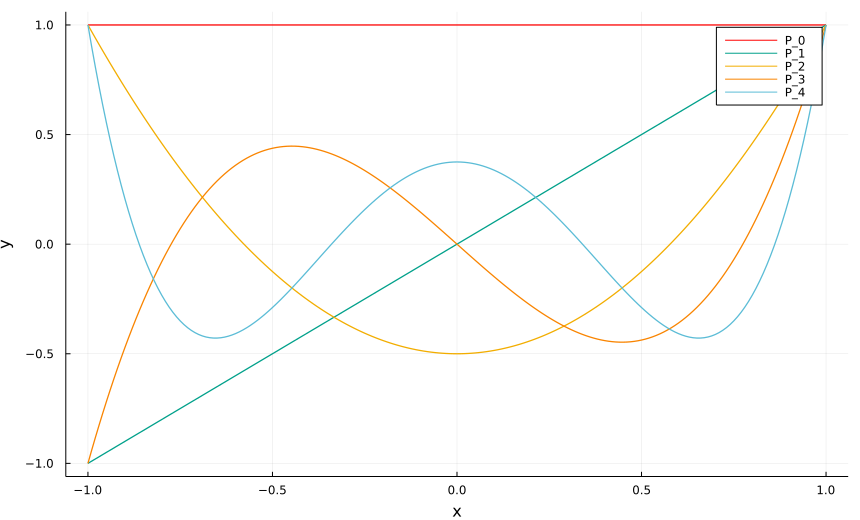

In [4]:
xs = -1:0.01:1
n = 5
col = ColorDict["wesanderson"]["Darjeeling1"]
plot_Legendre(xs, n, col)

In [5]:
println("Gauss")
for i = 2:4 println("k = $i ", gauss(Float64, i)[1]) end

Gauss
k = 2 [-0.5773502691896258, 0.5773502691896258]
k = 3 [-0.7745966692414834, 0.0, 0.7745966692414834]
k = 4 [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


In [6]:
println("Legendre")
for i = 2:4 println("k = $i ", roots(Legendre(4)[i+1])) end

Legendre
k = 2 [-0.5773502691896258, 0.5773502691896256]
k = 3 [-0.7745966692414834, 0.7745966692414835, 0.0]
k = 4 [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]


### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [7]:
function int(k, f)
    (xp, a) = gauss(Float64, k)
    sum(a .* f.(xp)) 
end

int (generic function with 1 method)

In [8]:
function n_int(k, f, n)
    ns = []
    gs = []
    as = []  
    errs = []
    for i = 1:n
        prepend!(coeffs(f), 0)
        F = integrate(f)
        push!(ns, i)
        push!(gs, int(k, f))
        push!(as, F(1) - F(-1))
        push!(errs, abs(int(k, f) - (F(1) - F(-1))))
    end
    return DataFrame(n=ns, Gauss=gs, analytical=as, error=errs) 
end

n_int (generic function with 1 method)

In [9]:
f = Polynomial([1])
k = 8
n = 2*k+5
df = n_int(k, f, n)

,n,Gauss,analytical,error
,Any,Any,Any,Any
1,1,3.19189e-16,0.0,3.19189e-16
2,2,0.666667,0.666667,0.0
3,3,2.63678e-16,0.0,2.63678e-16
4,4,0.4,0.4,1.66533e-16
5,5,2.22045e-16,0.0,2.22045e-16
6,6,0.285714,0.285714,1.66533e-16
7,7,1.80411e-16,0.0,1.80411e-16
8,8,0.222222,0.222222,1.38778e-16
9,9,1.38778e-16,0.0,1.38778e-16


### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [10]:
function ab_int(k, f, a, b)
    (xp, ai) = gauss(Float64, k)
    ((b-a)/2) * sum(ai .* f.((xp .* ((b-a)/2)) .+ ((b+a)/2))) 
end

ab_int (generic function with 1 method)

In [11]:
f = Polynomial([0, 1, 0, 1])
F = integrate(f)
a, b = (0, 10)
k = 5
println("gauss: ", ab_int(k, f, a, b), "  ", "analytical: ", F(b)-F(a))
k = 6
println("gauss: ", ab_int(k, f, a, b), "  ", "analytical: ", F(b)-F(a))

gauss: 2550.0  analytical: 2550.0
gauss: 2550.0000000000005  analytical: 2550.0


In [12]:
h(x) = cos(x)
a, b = (0, pi/2)
k = 5
println("gauss: ", ab_int(k, h, a, b), "  ", "analytical: ", sin(b)-sin(a))

gauss: 1.0000000000395648  analytical: 1.0


In [13]:
f = Polynomial([0, 0, 1])
F = integrate(f)
a, b = (0, 1)
k = 3
println("gauss: ", ab_int(k, f, a, b), "  ", "analytical: ", F(b)-F(a))
k = 8
println("gauss: ", ab_int(k, f, a, b), "  ", "analytical: ", F(b)-F(a))

gauss: 0.3333333333333333  analytical: 0.3333333333333333
gauss: 0.33333333333333337  analytical: 0.3333333333333333


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [14]:
# całka od 0 do 1 dla x^2
f = Polynomial([0, 0, 1])
I, E = quadgk(f, 0, 1)
I

0.3333333333333333

In [15]:
# całka od -Inf do +Inf standardowego rozkładu normalnego Gaussa
G(x) = 1/(sqrt(2*pi))*exp(-(x^2)/2)
IG, EG = quadgk(G, -Inf, Inf)
IG

1.0000000000032583

### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [16]:
function rect(a, b, f, n)
    h = (b - a)/n
    ans = 0
    for i = 0:(n-1)
        y = (1/2)*(a + i*h + a + (i + 1)*h)
        ans += f(y)*h
    end
    return ans
end

rect (generic function with 1 method)

In [17]:
function trapez(a, b, f, n)
    h = (b - a)/n
    ans = 0
    for i = 0:(n-1)
        ans += (1/2) * (f(a + i*h) + f(a + (i+1)*h)) * h
    end
    return ans
end

trapez (generic function with 1 method)

In [18]:
function simpson(a, b, f, n)
    h = (b - a)/n
    m = n/2
    ans = 0
    for j = 1:(m-1)
        ans += (2*f(a+2*j*h) + 4*f(a+(2*j-1)*h))
    end
    return (h/3)*( f(a) + ans + 4*f(a+(2*m-1)*h) + f(a+2*m*h))
end

simpson (generic function with 1 method)

In [19]:
a = 2
b = 5
g(x) = x^2
G(x) = (1/3)*x^3
n = 1000
r = rect(a, b, g, n)
t = trapez(a, b, g, n)
s = simpson(a, b, g, n)
analytical = G(b) - G(a)
println("rectangles: ", r)
println("trapeziums: ", t)
println("simpsons: ", s)
println("analytical: ", analytical)

rectangles: 38.99999775
trapeziums: 39.00000450000002
simpsons: 38.99999999999999
analytical: 39.0


In [20]:
function integrations(ns, a, b, f, F)
    hs = []
    rs = []
    ts = []
    ss = []
    an = F(b)-F(a)
    for i = ns
        push!(rs, abs(an - rect(a, b, f, i)))
        push!(ts, abs(an - trapez(a, b, f, i)))
        push!(ss, abs(an - simpson(a, b, f, i)))
        push!(hs, (b-a)/i)
    end
    return DataFrame(h=hs, rectangles=rs, trapeziums=ts, simpsons=ss)
end

integrations (generic function with 1 method)

In [21]:
ns = 20:20:1000
a1 = 2
b1 = 3
h1(x) = exp(x)
H1(x) = exp(x)

a2 = 0
b2 = 2*pi
h2(x) = sin(x)
H2(x) = -cos(x)

df1 = integrations(ns, a1, b1, h1, H1)
df2 = integrations(ns, a2, b2, h2, H2)
print()

In [22]:
DataFrames.first(df1, 5)

,h,rectangles,trapeziums,simpsons
,Any,Any,Any,Any
1,0.05,0.00132245,0.00264499,4.40719e-7
2,0.025,0.000330631,0.000661268,2.75511e-8
3,0.0166667,0.000146949,0.000293899,5.44241e-9
4,0.0125,8.2659e-5,0.000165318,1.72204e-9
5,0.01,5.29018e-5,0.000105804,7.05354e-10


In [23]:
DataFrames.first(df2, 5)

,h,rectangles,trapeziums,simpsons
,Any,Any,Any,Any
1,0.314159,3.33067e-16,1.66533e-16,9.54063e-17
2,0.15708,4.52763e-16,2.41127e-16,4.42995e-16
3,0.10472,2.87097e-16,2.94036e-16,1.85221e-16
4,0.0785398,8.72132e-16,1.661e-16,4.9762e-16
5,0.0628319,3.64292e-17,5.76796e-17,4.95961e-16


In [24]:
function plot_integrations(df, colors, mode)
    plot(size = (860, 450), xlabel = "h", ylabel = "error", plot_title=mode, width = 3.5)
    plot!(df.h, df.rectangles, color=colors[1], label = "rectangles")
    plot!(df.h, df.trapeziums, color=colors[2], label = "trapeziums")
    plot!(df.h, df.simpsons, color=colors[3], label = "simpsons")
    scatter!(df.h, df.rectangles, color=colors[1], label = "rectangles")
    scatter!(df.h, df.trapeziums, color=colors[2], label = "trapeziums")
    scatter!(df.h, df.simpsons, color=colors[3], label = "simpsons")
end

plot_integrations (generic function with 1 method)

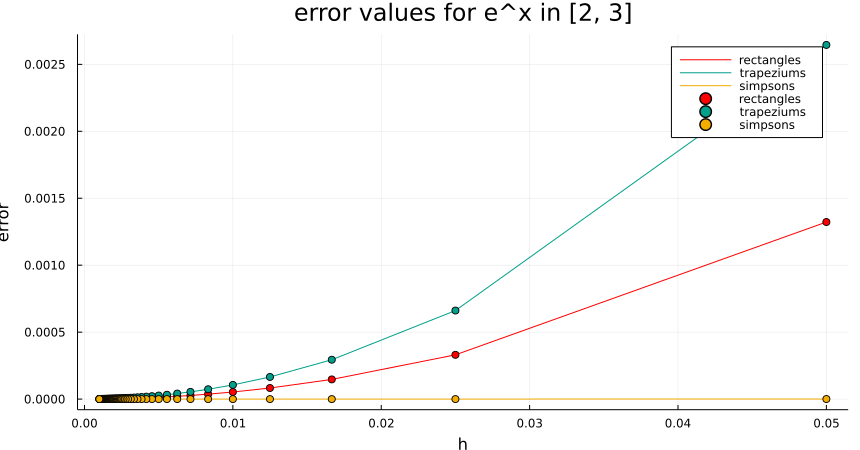

In [27]:
colors1 = ColorDict["wesanderson"]["Darjeeling1"][1:3]
plot_integrations(df1, colors1, "error values for e^x in [2, 3]")

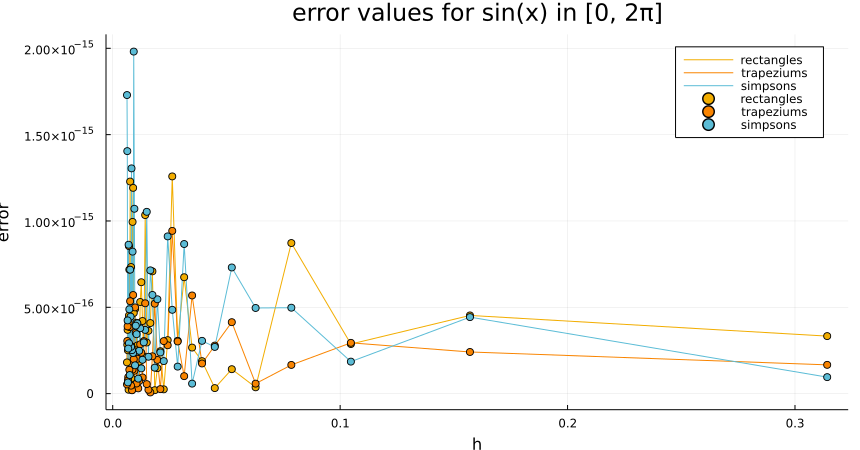

In [28]:
colors2 = ColorDict["wesanderson"]["Darjeeling1"][3:5]
plot_integrations(df2, colors2, "error values for sin(x) in [0, 2π]")